In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
path='https://raw.githubusercontent.com/AbedMHroub/Corona-virus-COVID19-predictions-project/master/dataset/Infected.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(13)

,num_of_date,num_of_patients,Date_test,num_of_date_test,num_of_patients_test
Date,,,,,
2020-01-21,1,1,2020-02-05,16.0,11.0
2020-01-22,2,1,2020-02-16,27.0,13.0
2020-01-23,3,1,2020-02-22,33.0,15.0
2020-01-24,4,2,2020-02-27,38.0,58.0
2020-01-25,5,2,2020-03-03,43.0,118.0
2020-01-26,6,5,2020-03-05,45.0,217.0
2020-01-27,7,5,2020-03-12,52.0,1663.0
2020-01-28,8,5,2020-03-23,63.0,43847.0
2020-01-29,9,5,2020-03-30,70.0,161807.0


In [3]:
x = ds['num_of_date']
y = ds['num_of_patients']
x_test_patient = ds['num_of_date_test'][:12]
y_test_patient = ds['num_of_patients_test'][:12]
x_prediction =[[95],[96],[97],[98],[99],[100],[101]]

In [5]:
linear_regression=LinearRegression()

yy=np.log10(y)

scores = []
Linear_Regression = LinearRegression()

In [6]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))
    
print("Average score for Linear Regression:",sum(scores)/len(scores))

Average score for Linear Regression: 0.947731350509466


In [7]:
Linear_Regression.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_1 =Linear_Regression.predict(x_test_patient.values.reshape(-1,1))
score=Linear_Regression.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Evaluation Score for Linear Regression :",score)

Final Evaluation Score for Linear Regression : 0.9303292029481324


In [8]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 2750230
day [96] = 3242796
day [97] = 3823580
day [98] = 4508382
day [99] = 5315832
day [100] = 6267896
day [101] = 7390475


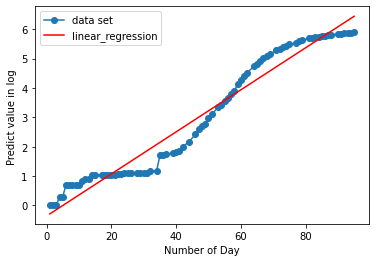

In [9]:
predicted1 = Linear_Regression.predict(x.values.reshape(-1,1))
predicted11 = 10**Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, yy, 'o-',label='data set')
plt.plot(x, predicted1,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log ')
plt.show()

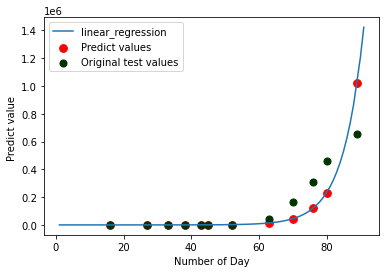

In [10]:
plt.plot(x[:79], predicted11[:79],label='linear_regression')
plt.scatter(x_test_patient, 10**evaluation_1 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

# MLP Regressor :Source Internet

In [11]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.3, max_iter=1000,random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train.values.reshape(-1,1), yy_train)
    scores_1.append(MLP_Regressor_1.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_2.fit(X_train.values.reshape(-1,1), yy_train)
    scores_2.append(MLP_Regressor_2.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_3.fit(X_train.values.reshape(-1,1), yy_train)
    scores_3.append(MLP_Regressor_3.score(X_test.values.reshape(-1,1), yy_test))
     #
    MLP_Regressor_4.fit(X_train.values.reshape(-1,1), yy_train)
    scores_4.append(MLP_Regressor_4.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_5.fit(X_train.values.reshape(-1,1), yy_train)
    scores_5.append(MLP_Regressor_5.score(X_test.values.reshape(-1,1), yy_test))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)

Average score for MLP_Regressor_1: 0.9981930934058239 
Average score for MLP_Regressor_2: 0.9978634714650519 
Average score for MLP_Regressor_3: 0.9910101458175277 
Average score for MLP_Regressor_4: -0.22137070515497603 
Average score for MLP_Regressor_5: -0.2732449480660663


In [12]:
MLP_Regressor = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_3 =MLP_Regressor.predict(x_test_patient.values.reshape(-1,1))
score=MLP_Regressor.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Evaluation Score for MLP_Regressor :",score)

Final Evaluation Score for MLP_Regressor : 0.9985018884083259


In [13]:
print('Evaluation for expecting 6 days in future in MLP_Regressor:')
for predict in x_prediction:
  print('day',predict,'=',int(10**MLP_Regressor.predict([predict])))

Evaluation for expecting 6 days in future in MLP_Regressor:
day [95] = 783844
day [96] = 804273
day [97] = 825099
day [98] = 846431
day [99] = 868373
day [100] = 891026
day [101] = 914489


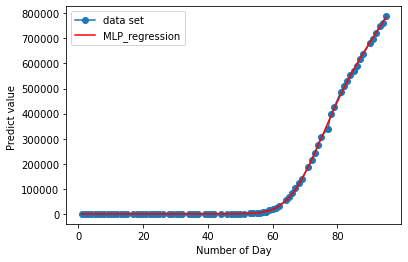

In [14]:
predicted3 =10**MLP_Regressor.predict(x.values.reshape(-1,1))
predicted33=MLP_Regressor.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x, predicted3,c='#ff0000',label='MLP_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

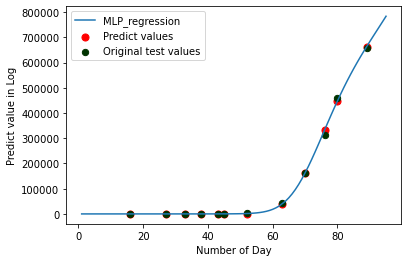

In [15]:
plt.plot(x, predicted3,label='MLP_regression')
plt.scatter(x_test_patient, 10**evaluation_3 ,s=50, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient,s=40, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()


	   The Two models in exponantial case 


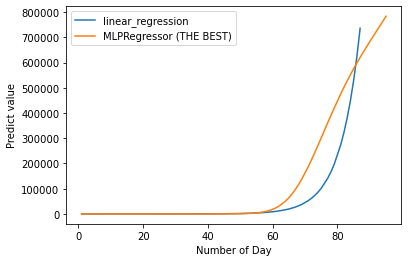

In [17]:
print("\n\t   The Two models in exponantial case ")
plt.plot(x[:76], 10**predicted1[:76],label='linear_regression')
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()


	   The Best model (MLP Model) 


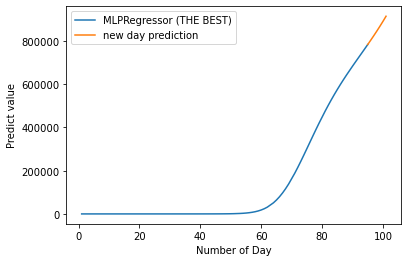

In [18]:
print("\n\t   The Best model (MLP Model) ")
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, 10**MLP_Regressor.predict(x_prediction),label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()